In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel(r'Anime_data.xlsx', engine='openpyxl')

In [3]:
dataset.head(2)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,...,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(12101, 44)

In [5]:
dataset.columns

Index(['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing',
       'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action',
       'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')

In [6]:
dataset.eps.describe()

count    12101.000000
mean        13.393356
std         57.925097
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       2527.000000
Name: eps, dtype: float64

In [7]:
dataset[(dataset['eps']>24)&(dataset.duration.isna())].shape

(1493, 44)

In [8]:
dataset_excluding_out = dataset[dataset['eps']<50]

In [9]:
dataset_excluding_out['eps_brackets'] = pd.cut(dataset_excluding_out['eps'], bins=[1,10,20,30,40,50],\
                                               labels = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5800\3191474710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_excluding_out['eps_brackets'] = pd.cut(dataset_excluding_out['eps'], bins=[1,10,20,30,40,50],\


In [10]:
dataset_excluding_out.shape

(11388, 45)

In [11]:
dataset_excluding_out.groupby(['eps_brackets']).duration.mean() 

eps_brackets
cat1    13.556684
cat2     7.419295
cat3     7.184783
cat4     8.549020
cat5     8.823529
Name: duration, dtype: float64

In [12]:
dataset_excluding_out[dataset_excluding_out['eps_brackets']=='cat1'].shape

(1901, 45)

In [13]:
dataset[(dataset['eps']<24)&(~dataset.duration.isna())].describe()

,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
count,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,...,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.00000,7098.000000,7098.000000,7098.000000
mean,2.546210,25.080727,0.104959,0.034658,0.095661,1531.826289,42.525923,609.343054,22.749084,2.742419,...,0.057904,0.044520,0.066216,0.042265,0.038321,0.033390,0.05410,0.033671,0.132150,0.039589
std,3.611337,32.016127,0.556363,0.182924,0.294146,4699.844075,238.987630,1301.861782,72.586285,0.831137,...,0.233578,0.206261,0.248677,0.201208,0.191983,0.179665,0.22623,0.180395,0.338678,0.195004
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,0.000000,0.000000,0.000000,41.000000,1.000000,28.000000,1.000000,2.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,0.000000,170.000000,5.000000,136.000000,5.000000,2.707000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,30.000000,0.000000,0.000000,0.000000,914.000000,26.000000,622.000000,17.000000,3.387750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,23.000000,163.000000,20.000000,1.000000,1.000000,115949.000000,15732.000000,21733.000000,2010.000000,4.663000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [14]:
dataset_excluding_out.groupby('mediaType').agg({'duration':'mean', 'mediaType':'count'})

,duration,mediaType
mediaType,,
DVD Special,10.995798,802
Movie,57.869213,1928
Music Video,4.009412,1290
OVA,32.913809,1769
Other,7.219378,576
TV,7.130662,3308
TV Special,45.795181,504
Web,7.116523,1152
is_missing,17.555556,59


In [15]:
dataset.isna().sum()

title                            1
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12100 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


In [18]:
dataset.drop(columns=['title', 'description'], axis=1, inplace=True)

In [19]:
dataset.head()

,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,...,0,0,0,0,0,0,0,0,0,0
1,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,...,1,0,0,0,0,0,0,0,0,0
2,Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,...,0,0,0,0,0,0,0,0,0,0
3,TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,...,0,0,0,0,0,0,0,0,0,0
4,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dataset.rating.describe()

count    12101.000000
mean         2.949037
std          0.827385
min          0.844000
25%          2.304000
50%          2.965000
75%          3.616000
max          4.702000
Name: rating, dtype: float64

In [21]:
dataset.dropna(inplace=True)
dataset.shape

(7465, 42)

In [22]:
def continuos_univariate_analysis(data,
                                  feature,
                                  figsize=(12, 8),
                                  kde=False,
                                  bins=None):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={'height_ratios': (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette("viridis", as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='yellow')
    sns.histplot(data=data,
                 x=feature,
                 ax=ax_hist,
                 showmeans=True,
                 color='crest',
                 bins=bins,
                 kde=kde) if bins else sns.histplot(
                     data=data, x=feature, ax=ax_hist, kde=kde, color='blue' )
    ax_hist.axvline(data[feature].mean(), color='cyan', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='orange', linestyle='--')
    

In [23]:
def discrete_univariate_analysis(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+1, 5))
    else:
        plt.figure(figsize=(n+1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "flare",
        order = data[feature].value_counts().index[:n].sort_values(
               ascending = False))
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x=p.get_x() +  p.get_width() / 2
        y=p.get_height()
        ax.annotate(label, (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points")
    plt.show()                        

In [24]:
dataset.columns

Index(['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease',
       'years_running', 'studio_primary', 'studios_colab', 'contentWarn',
       'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes',
       'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action', 'tag_Fantasy',
       'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')

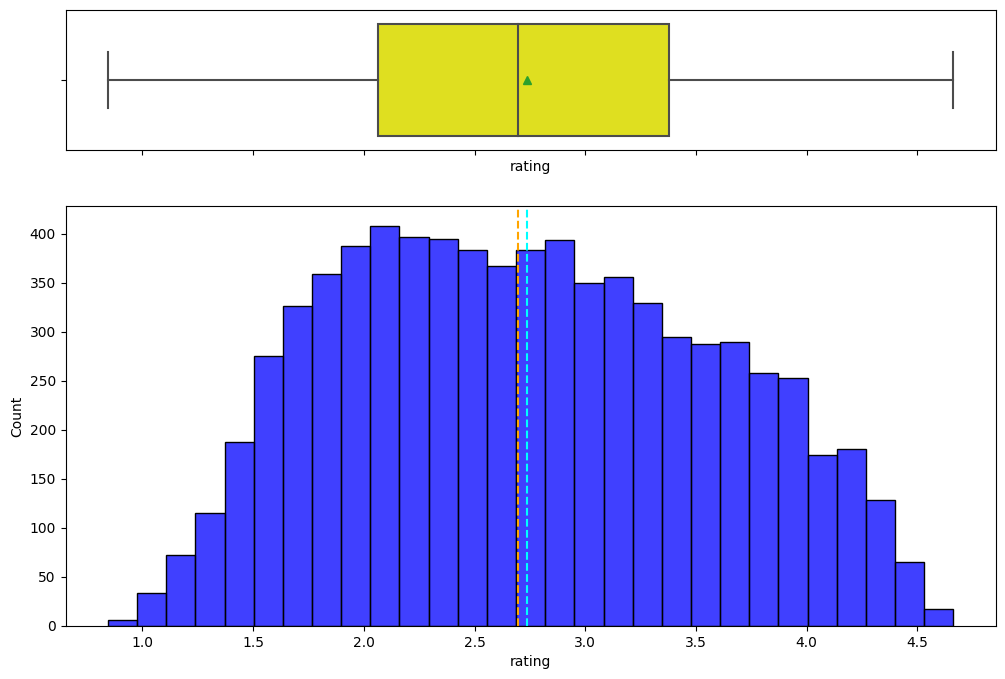

In [25]:
continuos_univariate_analysis(dataset, 'rating')

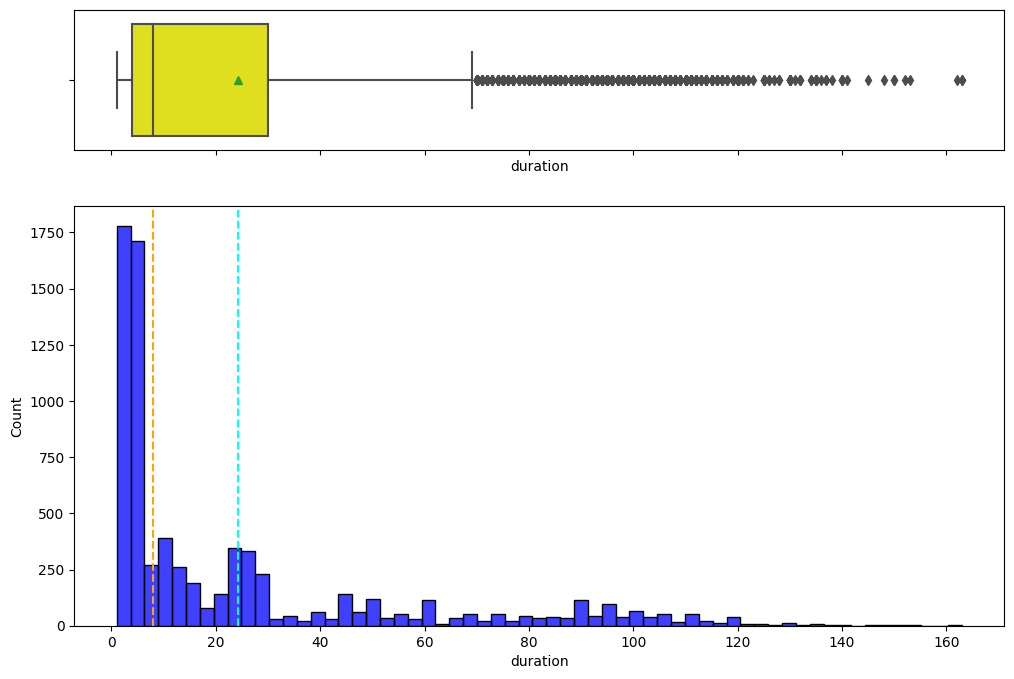

In [26]:
continuos_univariate_analysis(dataset, 'duration')

In [27]:
dataset[dataset['duration']>=80]['rating'].mean()

3.5694732254047326

In [28]:
dataset[dataset['duration']>=100]['rating'].mean()

3.729269121813031

In [29]:
dataset[dataset['duration']>=110]['rating'].mean()      

3.7585191256830606

In [30]:
dataset[(dataset['duration']>=5)&(dataset['duration']<=30)]['rating'].mean()

2.7890469755469756

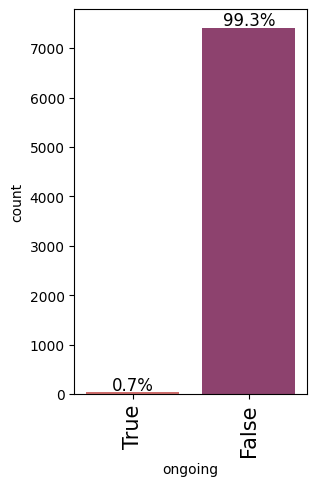

In [31]:
discrete_univariate_analysis(dataset, "ongoing", perc=True)

In [32]:
dataset[dataset['ongoing']==True]['rating'].mean()

3.1624600000000003

In [33]:
dataset[dataset['ongoing']==True]['duration'].mean()

8.94

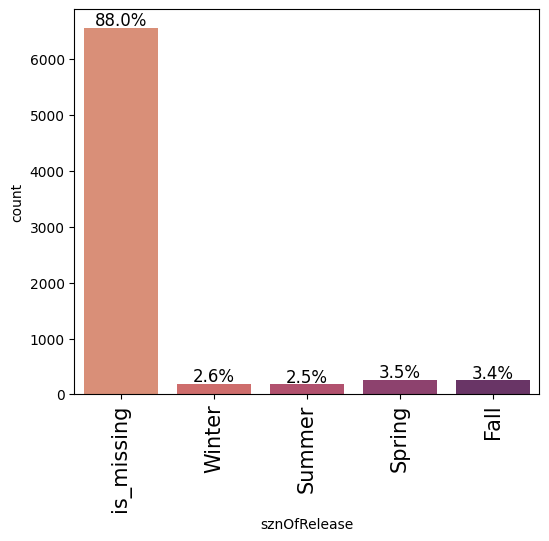

In [34]:
discrete_univariate_analysis(dataset, "sznOfRelease", perc=True)

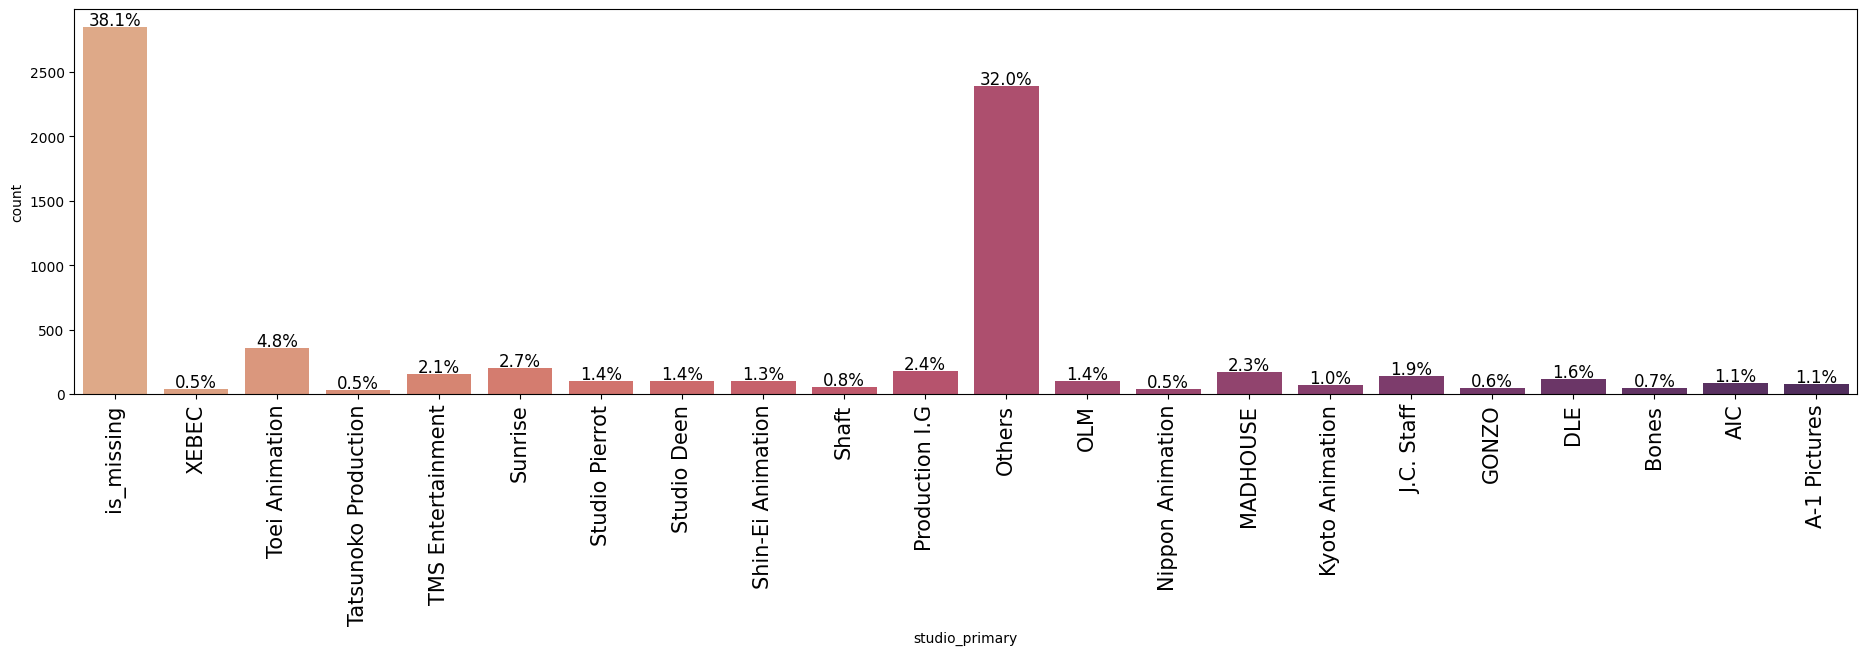

In [35]:
discrete_univariate_analysis(dataset, "studio_primary", perc=True)

In [36]:
dataset[dataset['rating']>4]['studio_primary'].value_counts(normalize=True).mul(100).round(2)

studio_primary
Others                  38.25
Production I.G           8.42
is_missing               7.02
TMS Entertainment        5.96
MADHOUSE                 5.96
Sunrise                  4.91
Kyoto Animation          4.04
Studio Deen              3.68
Bones                    3.68
A-1 Pictures             3.68
Toei Animation           3.51
Shaft                    3.33
J.C. Staff               3.16
Studio Pierrot           2.46
XEBEC                    0.35
Tatsunoko Production     0.35
Nippon Animation         0.35
OLM                      0.35
Shin-Ei Animation        0.35
GONZO                    0.18
Name: proportion, dtype: float64

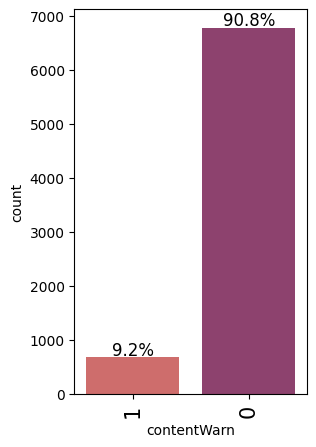

In [37]:
discrete_univariate_analysis(dataset, 'contentWarn', perc=True)

In [38]:
corr_cols = [item for item  in  dataset.columns if  "tag" not in  item]

In [39]:
corr_cols 

['mediaType',
 'eps',
 'duration',
 'ongoing',
 'sznOfRelease',
 'years_running',
 'studio_primary',
 'studios_colab',
 'contentWarn',
 'watched',
 'watching',
 'wantWatch',
 'dropped',
 'rating',
 'votes']

In [40]:
dataset['ongoing'] = dataset['ongoing'].astype(int)
corr_cols = ['eps', 'duration', 'ongoing', 'years_running', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']

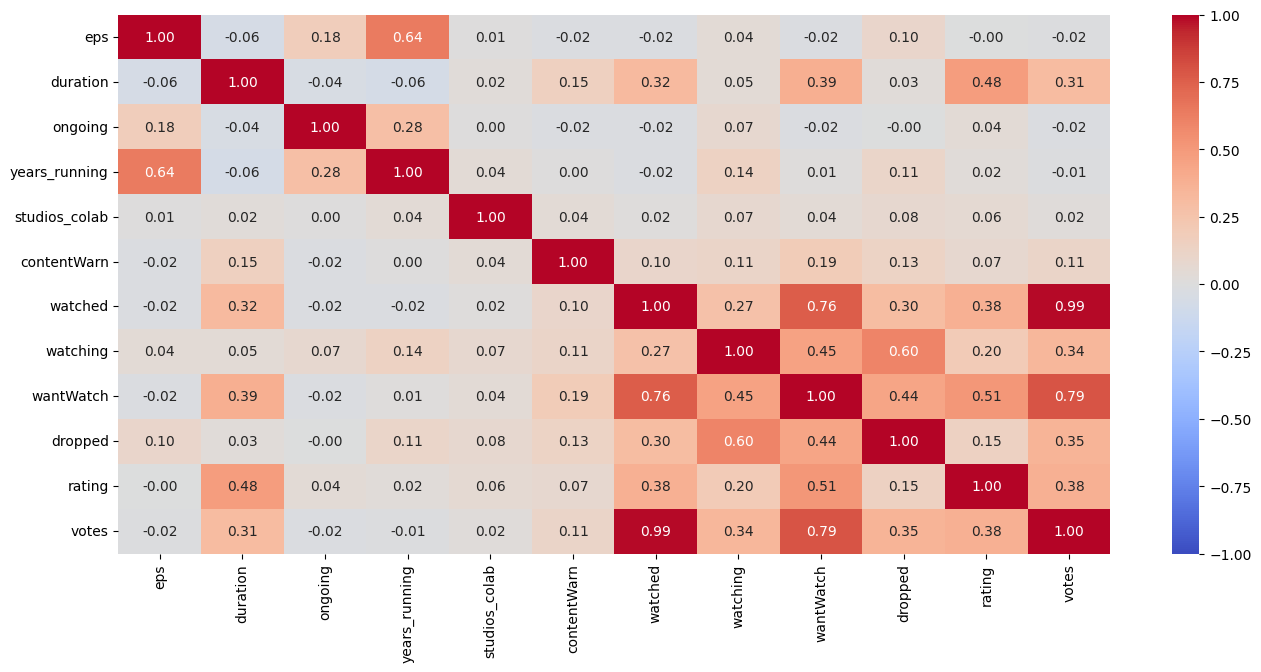

In [41]:
plt.figure(figsize=(16, 7))
sns.heatmap(dataset[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm') 
plt.show()

In [42]:
dataset.drop(columns= ['eps', 'watched'], inplace=True)

In [43]:
dataset.shape

(7465, 40)

<Axes: xlabel='sznOfRelease', ylabel='rating'>

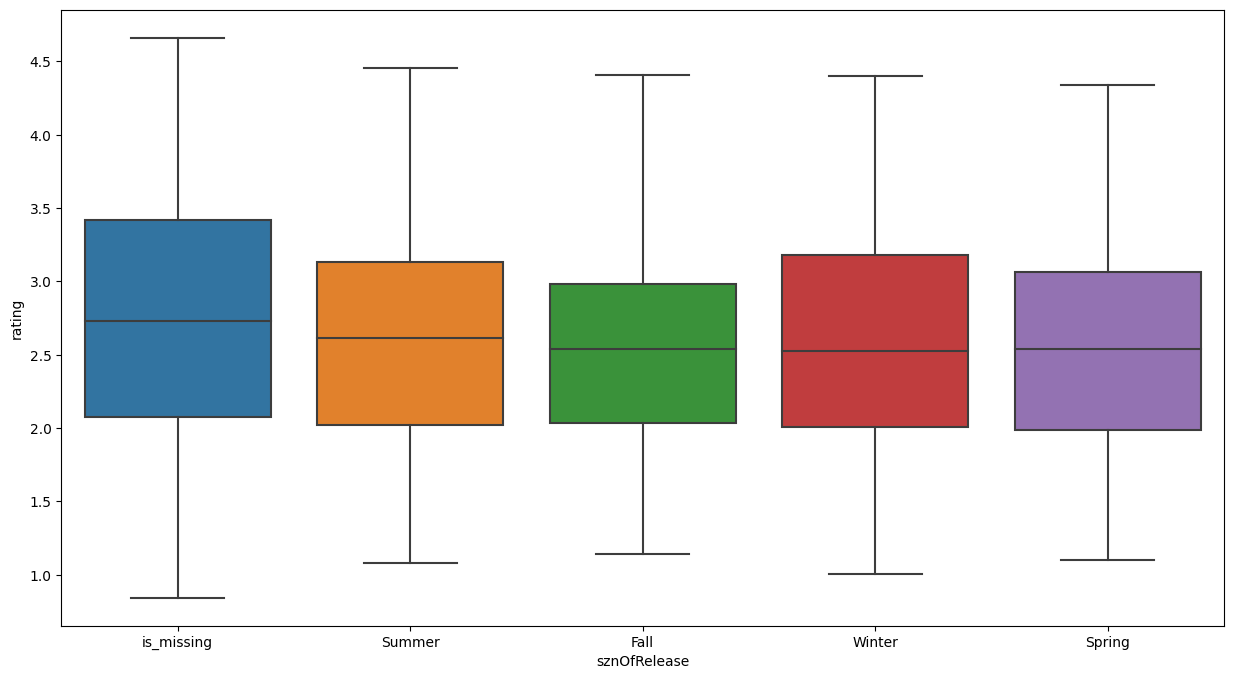

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'sznOfRelease', y='rating', data=dataset)

In [45]:
#MODEL BUILDING = REGRESSION

In [46]:
x = dataset.drop(['rating'], axis=1)
y = dataset['rating']

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 1 to 12100
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mediaType                   7465 non-null   object 
 1   duration                    7465 non-null   float64
 2   ongoing                     7465 non-null   int32  
 3   sznOfRelease                7465 non-null   object 
 4   years_running               7465 non-null   int64  
 5   studio_primary              7465 non-null   object 
 6   studios_colab               7465 non-null   int64  
 7   contentWarn                 7465 non-null   int64  
 8   watching                    7465 non-null   int64  
 9   wantWatch                   7465 non-null   int64  
 10  dropped                     7465 non-null   int64  
 11  votes                       7465 non-null   int64  
 12  tag_Based_on_a_Manga        7465 non-null   int64  
 13  tag_Comedy                  7465 non-

In [48]:
x = pd.get_dummies(x, columns=x.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
x.head()

,duration,ongoing,years_running,studios_colab,contentWarn,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,...,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,107.0,0,0,0,0,1453,21733,124,43960,0,...,False,False,False,False,False,False,False,False,False,False
2,130.0,0,0,0,1,946,17148,132,33752,1,...,False,False,False,False,False,False,False,False,False,False
8,111.0,0,0,0,0,280,6624,150,6254,1,...,False,False,False,False,True,False,False,False,False,False
27,125.0,0,0,0,0,589,12388,161,82752,0,...,False,False,False,False,False,False,False,False,False,False
31,117.0,0,0,0,0,538,15651,130,26465,0,...,False,False,False,False,False,False,False,False,False,False


In [49]:
x.drop(columns='ongoing', inplace=True)

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 1 to 12100
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   duration                             7465 non-null   float64
 1   years_running                        7465 non-null   int64  
 2   studios_colab                        7465 non-null   int64  
 3   contentWarn                          7465 non-null   int64  
 4   watching                             7465 non-null   int64  
 5   wantWatch                            7465 non-null   int64  
 6   dropped                              7465 non-null   int64  
 7   votes                                7465 non-null   int64  
 8   tag_Based_on_a_Manga                 7465 non-null   int64  
 9   tag_Comedy                           7465 non-null   int64  
 10  tag_Action                           7465 non-null   int64  
 11  tag_Fantasy                       

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [53]:
print("Number of samples for train", X_train.shape[0])
print("Number of samples for test", X_test.shape[0])

Number of samples for train 5972
Number of samples for test 1493


In [54]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [55]:
def Model_performance(model, predictor, target):
    pred = model.predict(predictor)
    r2 = r2_score(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    
    results= pd.DataFrame({
        "RMSE":rmse,
        "R2 Score":r2
        
    }, index=[0]
    )
    
    return results

In [56]:
print("Training Data Performance")
lin_model_train = Model_performance(lin_model, X_train, Y_train)
lin_model_train

Training Data Performance


,RMSE,R2 Score
0,0.580109,0.515527


In [57]:
x.columns

Index(['duration', 'years_running', 'studios_colab', 'contentWarn', 'watching',
       'wantWatch', 'dropped', 'votes', 'tag_Based_on_a_Manga', 'tag_Comedy',
       'tag_Action', 'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen',
       'tag_Original_Work', 'tag_Non_Human_Protagonists', 'tag_Drama',
       'tag_Adventure', 'tag_Family_Friendly', 'tag_Short_Episodes',
       'tag_School_Life', 'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life',
       'tag_Seinen', 'tag_Supernatural', 'tag_Magic',
       'tag_Animal_Protagonists', 'tag_Ecchi', 'tag_Mecha',
       'tag_Based_on_a_Light_Novel', 'tag_CG_Animation', 'tag_Superpowers',
       'tag_Others', 'tag_missing', 'mediaType_Movie', 'mediaType_Music Video',
       'mediaType_OVA', 'mediaType_Other', 'mediaType_TV',
       'mediaType_TV Special', 'mediaType_Web', 'mediaType_is_missing',
       'sznOfRelease_Spring', 'sznOfRelease_Summer', 'sznOfRelease_Winter',
       'sznOfRelease_is_missing', 'studio_primary_AIC', 'studio_primary_Bones',
    

In [58]:
# FEATURE SELECTION TECHNIQUE

In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
reg = LinearRegression()
sfs = SFS(reg, k_features = X_train.shape[1],
         forward = True, floating=False, scoring='r2', n_jobs= -1, cv=5)
sfs = sfs.fit(X_train, Y_train)

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
reg = LinearRegression()
sfs = SFS(reg, k_features = 30,
         forward = True, floating=False, scoring='r2', n_jobs= -1, cv=5)
sfs = sfs.fit(X_train, Y_train)

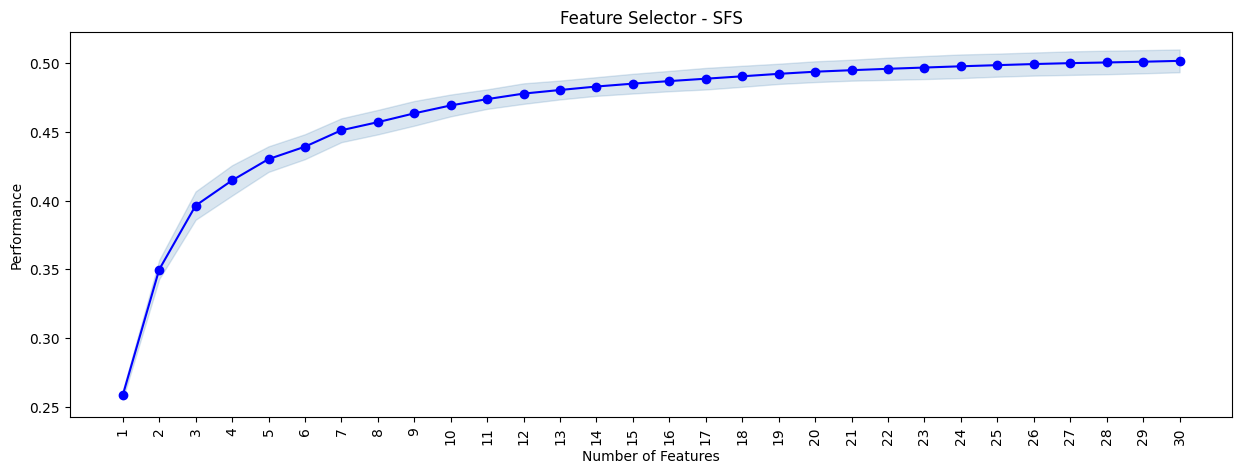

In [61]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title("Feature Selector - SFS")
plt.xticks(rotation=90)
plt.show()

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
reg = LinearRegression()
sfs = SFS(reg, k_features = 35,
         forward = True, floating=False, scoring='r2', n_jobs= -1, cv=5)
sfs = sfs.fit(X_train, Y_train)

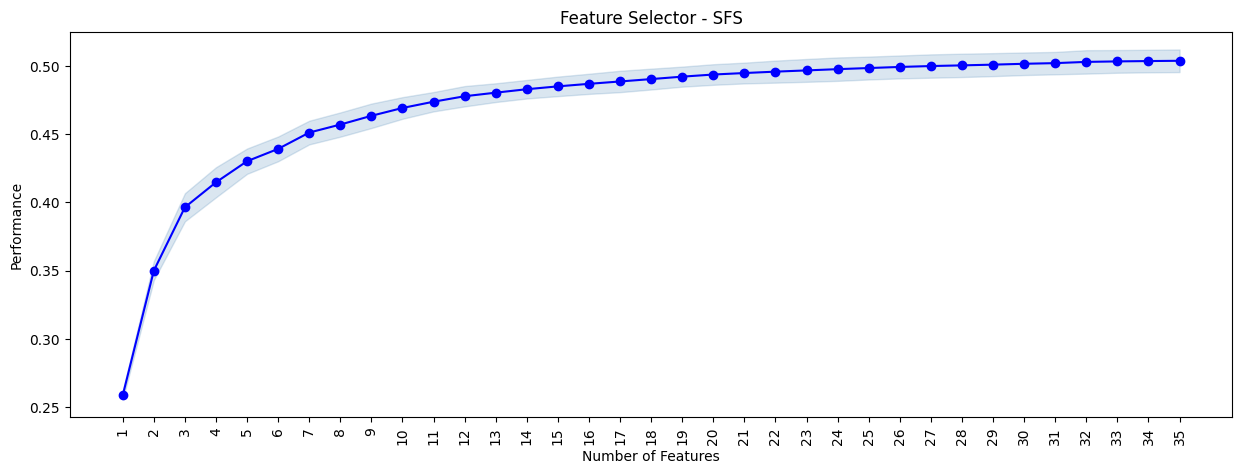

In [63]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title("Feature Selector - SFS")
plt.xticks(rotation=90)
plt.show()

In [64]:
feature_index = list(sfs.k_feature_idx_)
print(feature_index)

[0, 1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 16, 18, 19, 20, 22, 23, 24, 25, 30, 35, 37, 38, 39, 41, 48, 49, 56, 57, 60, 62, 63, 65, 66, 67]


In [65]:
X_train.columns[feature_index]

Index(['duration', 'years_running', 'contentWarn', 'wantWatch', 'dropped',
       'votes', 'tag_Based_on_a_Manga', 'tag_Action', 'tag_Fantasy',
       'tag_Sci_Fi', 'tag_Shounen', 'tag_Drama', 'tag_Family_Friendly',
       'tag_Short_Episodes', 'tag_School_Life', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural',
       'tag_Based_on_a_Light_Novel', 'mediaType_Movie', 'mediaType_OVA',
       'mediaType_Other', 'mediaType_TV', 'mediaType_Web',
       'studio_primary_Bones', 'studio_primary_DLE', 'studio_primary_Others',
       'studio_primary_Production I.G', 'studio_primary_Studio Deen',
       'studio_primary_Sunrise', 'studio_primary_TMS Entertainment',
       'studio_primary_Toei Animation', 'studio_primary_XEBEC',
       'studio_primary_is_missing'],
      dtype='object')

In [66]:
X_train_final = X_train[X_train.columns[feature_index]]
X_test_final = X_test[X_test.columns[feature_index]]

In [67]:
lin_model_v2 = LinearRegression()
lin_model_v2.fit(X_train_final, Y_train)

LinearRegression()

In [68]:
print("Training Data Performance")
lin_model_train = Model_performance(lin_model, X_train, Y_train)
lin_model_train

Training Data Performance


,RMSE,R2 Score
0,0.580109,0.515527


In [69]:
print("Training Data Performance")
lin_model_train = Model_performance(lin_model, X_test, Y_test)
lin_model_train

Training Data Performance


,RMSE,R2 Score
0,0.566959,0.514441


In [70]:
X_train.head(2)

,duration,years_running,studios_colab,contentWarn,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,tag_Comedy,...,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
8843,1.0,0,0,0,0,17,0,14,0,0,...,False,False,False,False,False,False,False,False,False,True
1599,24.0,0,0,0,24,1117,15,735,1,1,...,True,False,False,False,False,False,False,False,False,False


NAME: CHAUDHARY SHUBHAM NARENDRA